# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_raw = pd.read_csv("assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [3]:
# frequency table for prestige and whether or not someone was admitted
print pd.crosstab(df_raw['admit'], df_raw['prestige'], rownames=['admit'])

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   97   93   55
1          33   53   28   12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [4]:
# create dummy variables for prestige
dummy_ranks = pd.get_dummies(df_raw['prestige'], prefix='prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: 3. In modelling dummy variables, it is n-1, where n is the number of levels available in the original variable. If dummy variables are created for all levels, we drop one level from the analysis. In this case, it is 3 as we have 4 levels, and we drop 1 for the modelling.


## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [5]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


In [6]:
#crosstab prestige 1 admission 
#frequency table cutting prestige and whether or not someone was admitted

print pd.crosstab(handCalc['admit'], handCalc['prestige_1.0'], rownames=['admit'])

prestige_1.0    0   1
admit                
0             243  28
1              93  33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [7]:
# Odds is ratio of the probability of success and the probability of failure. The odds of success are p/(1-p) 

prob_admit_success = float(33) / (float(28+33))
odds = prob_admit_success / (1 - prob_admit_success)
print 'The odds of being admitted to grad school if you attend a #1 ranked college is %s' % odds

The odds of being admitted to grad school if you attend a #1 ranked college is 1.17857142857


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [8]:
# Odds is ratio of the probability of success and the probability of failure. The odds of success are p/(1-p) 

prob_admit_success_notP1 = float(28) / (float(28+33))
odds2 = prob_admit_success_notP1 / (1 - prob_admit_success_notP1)
print 'The odds of being admitted to grad school if you did not attend a #1 ranked college is %s' % odds2

The odds of being admitted to grad school if you did not attend a #1 ranked college is 0.848484848485


#### 3.3 Calculate the odds ratio

In [9]:
# Odds ratio represent the odds that an outcome will occur given a particular exposure, compared to the odds of the outcome occurring in the absence of that exposure.

OR = odds / odds2
print 'The odd ratio is %s' % OR

The odd ratio is 1.38903061224


#### 3.4 Write this finding in a sentenance: 

Answer: The odds of one being admitted to graduate school if you attended a 1st ranked college, as opposed to one being admitted to graduate school without attending a 1st ranked college, is 1.389.

#### 3.5 Print the cross tab for prestige_4

In [10]:
#crosstab prestige 4 admission 
#frequency table cutting prestige and whether or not someone was admitted

print pd.crosstab(handCalc['admit'], handCalc['prestige_4.0'], rownames=['admit'])

prestige_4.0    0   1
admit                
0             216  55
1             114  12


#### 3.6 Calculate the OR 

In [11]:
prob_admit_success_P4 = float(12) / (float(55+12))
odds3 = prob_admit_success_P4 / (1 - prob_admit_success_P4)
print 'The odds of being admitted to grad school if you attend a #4 ranked college is %s' % odds3

The odds of being admitted to grad school if you attend a #4 ranked college is 0.218181818182


In [12]:
# Odds is ratio of the probability of success and the probability of failure. The odds of success are p/(1-p) 

prob_admit_success_notP4 = float(55) / (float(55+12))
odds4 = prob_admit_success_notP4 / (1 - prob_admit_success_notP4)
print 'The odds of being admitted to grad school if you did not attend a #4 ranked college is %s' % odds4

The odds of being admitted to grad school if you did not attend a #4 ranked college is 4.58333333333


In [13]:
# Odds ratio represent the odds that an outcome will occur given a particular exposure, compared to the odds of the outcome occurring in the absence of that exposure.

OR2 = odds3 / odds4
print 'The odd ratio is %s' % OR2

The odd ratio is 0.0476033057851


#### 3.7 Write this finding in a sentence

Answer: The odds of one being admitted to graduate school if you attended a 4th ranked college, as opposed to one being admitted to graduate school without attending a 4th ranked college, is 0.048.

## Part 4. Analysis

In [27]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [28]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [29]:
# covariates gre, gpa, prestige_2, prestige_3, prestige_4
train_cols = data.columns[1:]

#### 4.2 Fit the model

In [30]:
logit = sm.Logit(data['admit'], data[train_cols])
model_result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [31]:
print model_result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Sun, 02 Jul 2017   Pseudo R-squ.:                 0.08166
Time:                        14:03:13   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa              0.7793      0.333      2.344      0.019       0.128       1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [32]:
print model_result.params

gre             0.002218
gpa             0.779337
prestige_2.0   -0.680137
prestige_3.0   -1.338677
prestige_4.0   -1.553411
intercept      -3.876854
dtype: float64


In [33]:
# odds ratio is the exponential of the coefficient
print np.exp(model_result.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


In [34]:
# 95% CI of the coefficients
conf = model_result.conf_int()
conf['OR'] = model_result.params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: If the individual has attended a school of 2nd ranked prestige, the odds of being admitted is 0.51 or about 51%.

#### 4.6 Interpret the OR of GPA

Answer: For every one unit increase in the individual's GPA, the odds of being admitted is increased by a factor of 2.2 or about 220%.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [35]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [36]:
# instead of generating all possible values of GRE and GPA, we're going to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])


gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
print combos.head()

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]
       0         1    2    3
0  220.0  2.260000  1.0  1.0
1  220.0  2.260000  2.0  1.0
2  220.0  2.260000  3.0  1.0
3  220.0  2.260000  4.0  1.0
4  220.0  2.453333  1.0  1.0


#### 5.1 Recreate the dummy variables

In [37]:
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
print combos.head()

     gre       gpa  prestige  intercept
0  220.0  2.260000       1.0        1.0
1  220.0  2.260000       2.0        1.0
2  220.0  2.260000       3.0        1.0
3  220.0  2.260000       4.0        1.0
4  220.0  2.453333       1.0        1.0


In [42]:
# recreate the dummy variables
dummy_prestige = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_prestige.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

# join the dummy variables to combos
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_prestige.loc[:, 'prestige_2':])
train_cols2 = combos.columns[1:]

#### 5.2 Make predictions on the enumerated dataset

In [43]:
combos['admit_predict'] = model_result.predict(combos[train_cols2])
print combos.head()

     gre       gpa  prestige  intercept  prestige_2  prestige_3  prestige_4  \
0  220.0  2.260000       1.0        1.0           0           0           0   
1  220.0  2.260000       2.0        1.0           1           0           0   
2  220.0  2.260000       3.0        1.0           0           1           0   
3  220.0  2.260000       4.0        1.0           0           0           1   
4  220.0  2.453333       1.0        1.0           0           0           0   

   admit_predict  
0       0.526030  
1       0.388143  
2       0.527342  
3       0.192379  
4       0.526137  


#### 5.3 Interpret findings for the last 4 observations

In [44]:
combos.tail(4)

,gre,gpa,prestige,intercept,prestige_2,prestige_3,prestige_4,admit_predict
396,800.0,4.0,1.0,1.0,0,0,0,0.526992
397,800.0,4.0,2.0,1.0,1,0,0,0.389060
398,800.0,4.0,3.0,1.0,0,1,0,0.528304
399,800.0,4.0,4.0,1.0,0,0,1,0.192979


Answer: The students had the same GRE and GPA. The only difference is the prestige of the school they attended. The applicant who went to the 1st ranked school has 0.53 probability to be admitted to graduate school. The applicant who attended the 2nd rank school has a much lower probability at 0.39. Interestingly, the individual who attended 3rd ranked school has 0.53 probability to be admitted! The applicant who attended the 4th ranked school has the lowest probability at 0.19.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

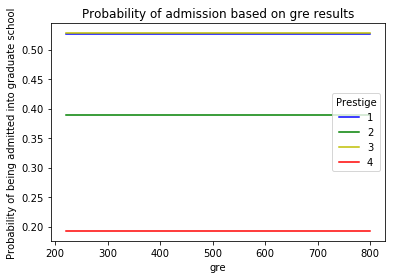

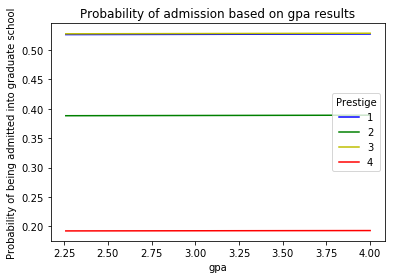

In [45]:
def isolate_and_plot(variable):
    # group data
    group_gre = pd.pivot_table(combos, values=['admit_predict'], index=[variable, 'prestige'], 
                             aggfunc=np.mean).fillna(0)
    
    # plot
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = group_gre.loc[group_gre.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_predict'], color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("Probability of being admitted into graduate school")
    pl.legend(['1', '2', '3', '4'], loc='right', title='Prestige')
    pl.title("Probability of admission based on " + variable + " results")
    pl.show()
    
isolate_and_plot('gre')
isolate_and_plot('gpa')